In [40]:
import pandas as pd
import numpy as np
import glob
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Define the list of training files
train_files = ['/kaggle/input/kaggle-stock-market-prediction/1_train.csv',
 '/kaggle/input/kaggle-stock-market-prediction/4_train.csv',
'/kaggle/input/kaggle-stock-market-prediction/3_train.csv',
'/kaggle/input/kaggle-stock-market-prediction/2_train.csv']

# Loop through each training file
for file in train_files:
    # Load the training data
    train_data = pd.read_csv(file)
    print(train_data.head())
#     print(train_data.shape)

In [4]:
train1 = pd.read_csv('/kaggle/input/kaggle-stock-market-prediction/1_train.csv')
train1.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,9.50,9.47,9.23,9.12,7.93,1.133345e+09
1,2010-06-30,9.25,9.22,9.00,9.04,7.52,7.394520e+08
2,2010-07-01,9.01,9.02,8.63,8.70,7.45,1.022896e+09
3,2010-07-02,8.98,8.96,8.74,8.94,7.68,6.938428e+08
4,2010-07-06,9.13,9.13,8.61,8.85,7.68,6.152356e+08
5,2010-07-07,8.92,9.36,8.99,9.36,7.87,6.545560e+08
6,2010-07-08,9.57,9.38,9.09,9.21,7.70,7.381444e+08
7,2010-07-09,9.21,9.18,8.95,9.26,8.06,4.333224e+08
8,2010-07-12,9.16,9.20,9.01,9.23,7.70,5.628784e+08
9,2010-07-13,9.27,9.27,8.98,9.20,7.56,1.190924e+09


In [5]:
train1['shifted_open'] = train1['Open'].shift(-1)

In [6]:
train1.shifted_open[2530] = train1.Open[2530]

In [7]:
train1.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,shifted_open
2526,2020-07-13,97.41,99.85,95.33,95.53,93.98,191649200.0,94.81
2527,2020-07-14,94.81,97.15,93.66,97.02,95.63,170989200.0,99.06
2528,2020-07-15,99.06,99.18,96.41,97.58,96.28,153198000.0,96.49
2529,2020-07-16,96.49,97.55,95.94,96.67,95.18,110577600.0,97.01
2530,2020-07-17,97.01,97.15,95.86,96.17,94.73,92186800.0,97.01


In [8]:
mean_squared_error(train1['Close'], train1['shifted_open'])

0.2706096799683919

In [9]:
test = pd.read_csv('/kaggle/input/kaggle-stock-market-prediction/test.csv')
test.head()

,Date,Open,High,Low,Adj Close,Volume,Company,Id
0,20-07-2020,101.28,110.03,99.24,109.62,256821000,4,0
1,21-07-2020,109.12,111.60,103.88,104.46,241608000,4,1
2,22-07-2020,106.65,108.45,104.05,105.86,212416500,4,2
3,23-07-2020,112.07,112.49,98.92,101.04,364927500,4,3
4,24-07-2020,94.49,97.76,91.17,94.47,290949000,4,4


In [11]:
train1.dtypes

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Adj Close       float64
Volume          float64
shifted_open    float64
dtype: object

In [12]:
train1.Date = pd.to_datetime(train1.Date)
train1.dtypes

Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Adj Close              float64
Volume                 float64
shifted_open           float64
dtype: object

In [13]:
train1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,shifted_open
0,2010-06-29,9.50,9.47,9.23,9.12,7.93,1.133345e+09,9.25
1,2010-06-30,9.25,9.22,9.00,9.04,7.52,7.394520e+08,9.01
2,2010-07-01,9.01,9.02,8.63,8.70,7.45,1.022896e+09,8.98
3,2010-07-02,8.98,8.96,8.74,8.94,7.68,6.938428e+08,9.13
4,2010-07-06,9.13,9.13,8.61,8.85,7.68,6.152356e+08,8.92


In [25]:
for i in range(2010, 2021, 1):
    print(i, (train1.Date.dt.year == i).sum())

2010 130
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 137


In [30]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits=5, test_size=365)

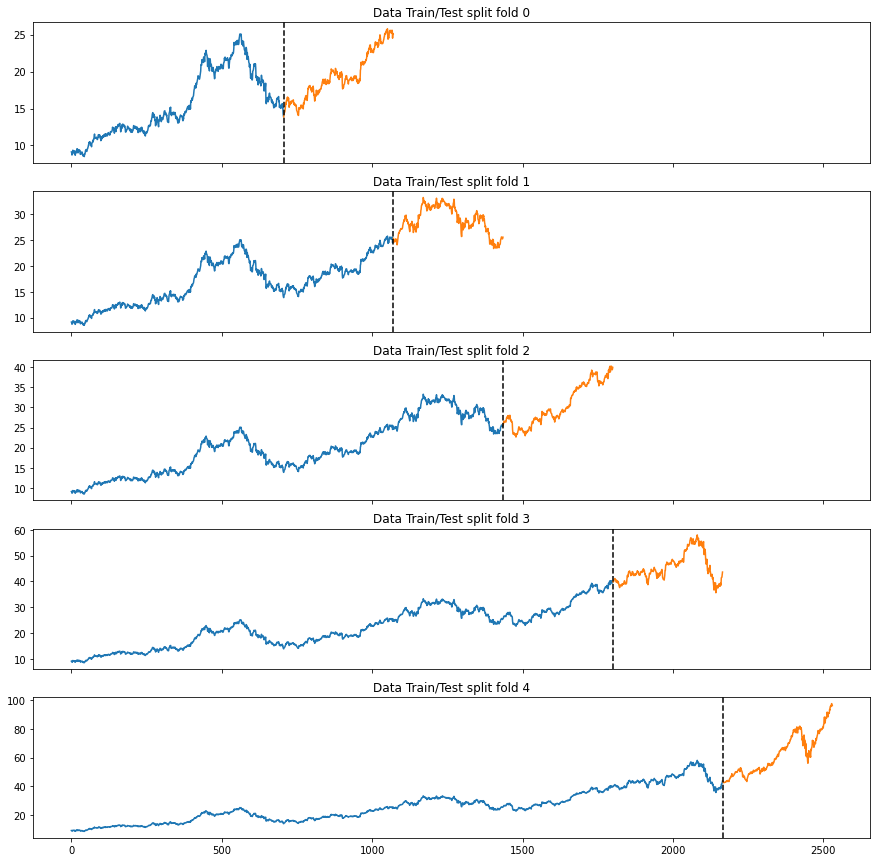

In [31]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(5,1, figsize=(15,15), sharex = True)

fold = 0
for train_idx, val_idx in tss.split(train1):
    train = train1.iloc[train_idx]
    test = train1.iloc[val_idx]
    train['Close'].plot(ax=axs[fold],
                       label='Training set',
                       title=f'Data Train/Test split fold {fold}')
    test['Close'].plot(ax = axs[fold],
                      label='Test set')
    axs[fold]. axvline(test.index.min(), color='black', ls='--')
    fold+=1
plt.show()

In [34]:
train1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,shifted_open
0,2010-06-29,9.50,9.47,9.23,9.12,7.93,1.133345e+09,9.25
1,2010-06-30,9.25,9.22,9.00,9.04,7.52,7.394520e+08,9.01
2,2010-07-01,9.01,9.02,8.63,8.70,7.45,1.022896e+09,8.98
3,2010-07-02,8.98,8.96,8.74,8.94,7.68,6.938428e+08,9.13
4,2010-07-06,9.13,9.13,8.61,8.85,7.68,6.152356e+08,8.92


# Linear Regression

Fold 0
(706, 8) (365, 8)
0.13618948644965467 0.3390829644803387
--------------------------------------------------------
Fold 1
(1071, 8) (365, 8)
0.14911426646318562 0.20366790196832105
--------------------------------------------------------
Fold 2
(1436, 8) (365, 8)
0.1582989927049422 0.22277628126690174
--------------------------------------------------------
Fold 3
(1801, 8) (365, 8)
0.16314149517003282 0.2858681979357668
--------------------------------------------------------
Fold 4
(2166, 8) (365, 8)
0.18702089020585078 0.5039801605860926
--------------------------------------------------------


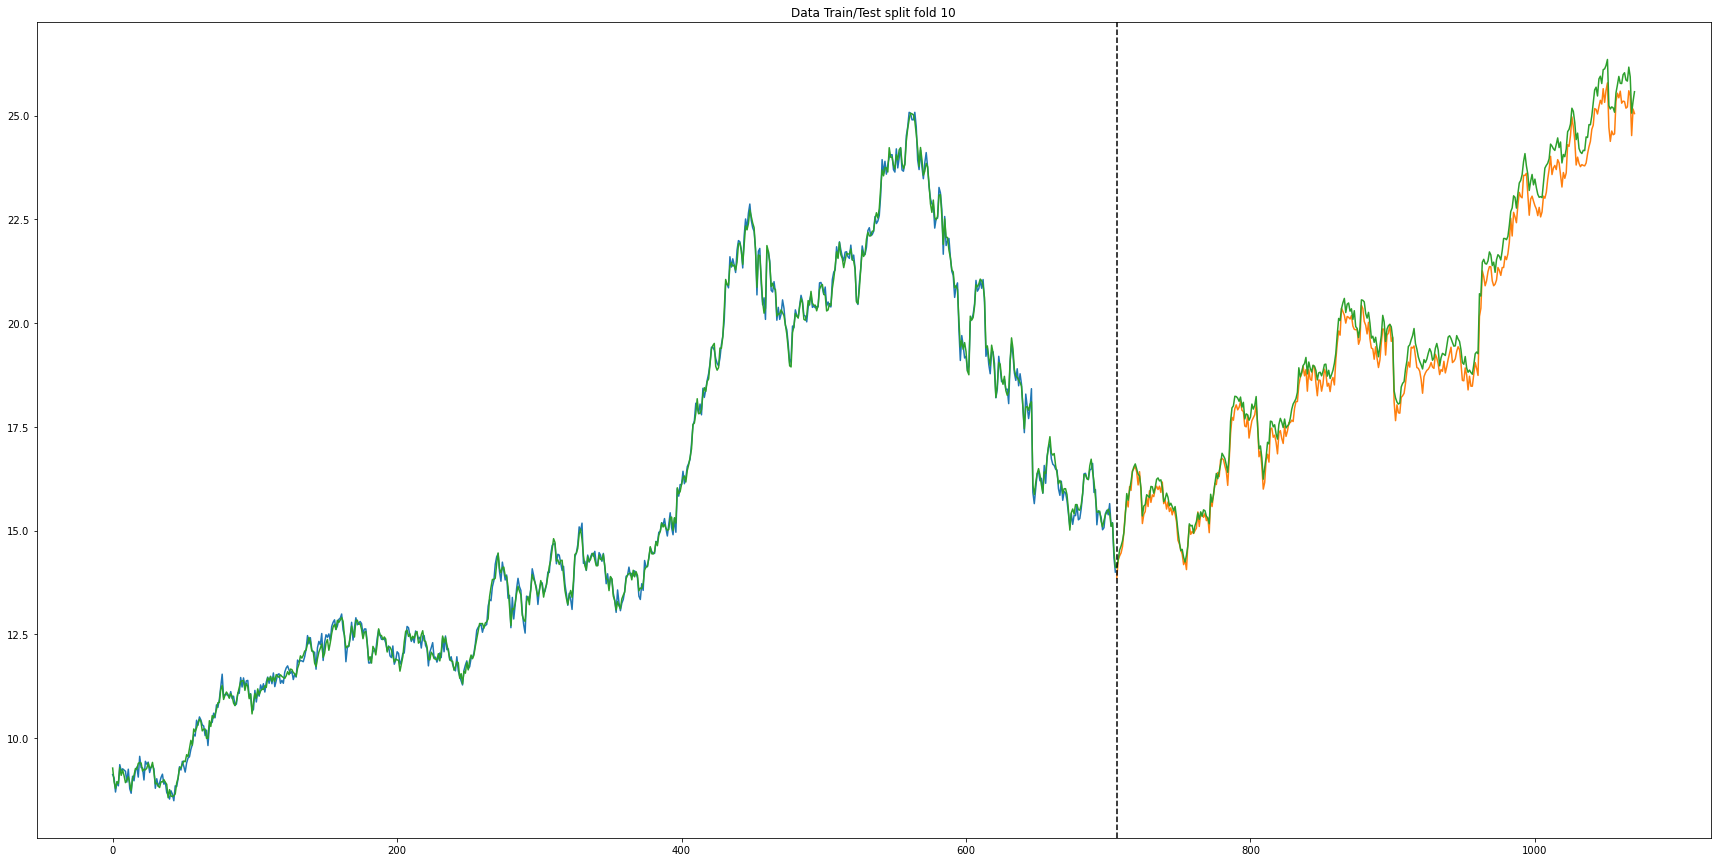

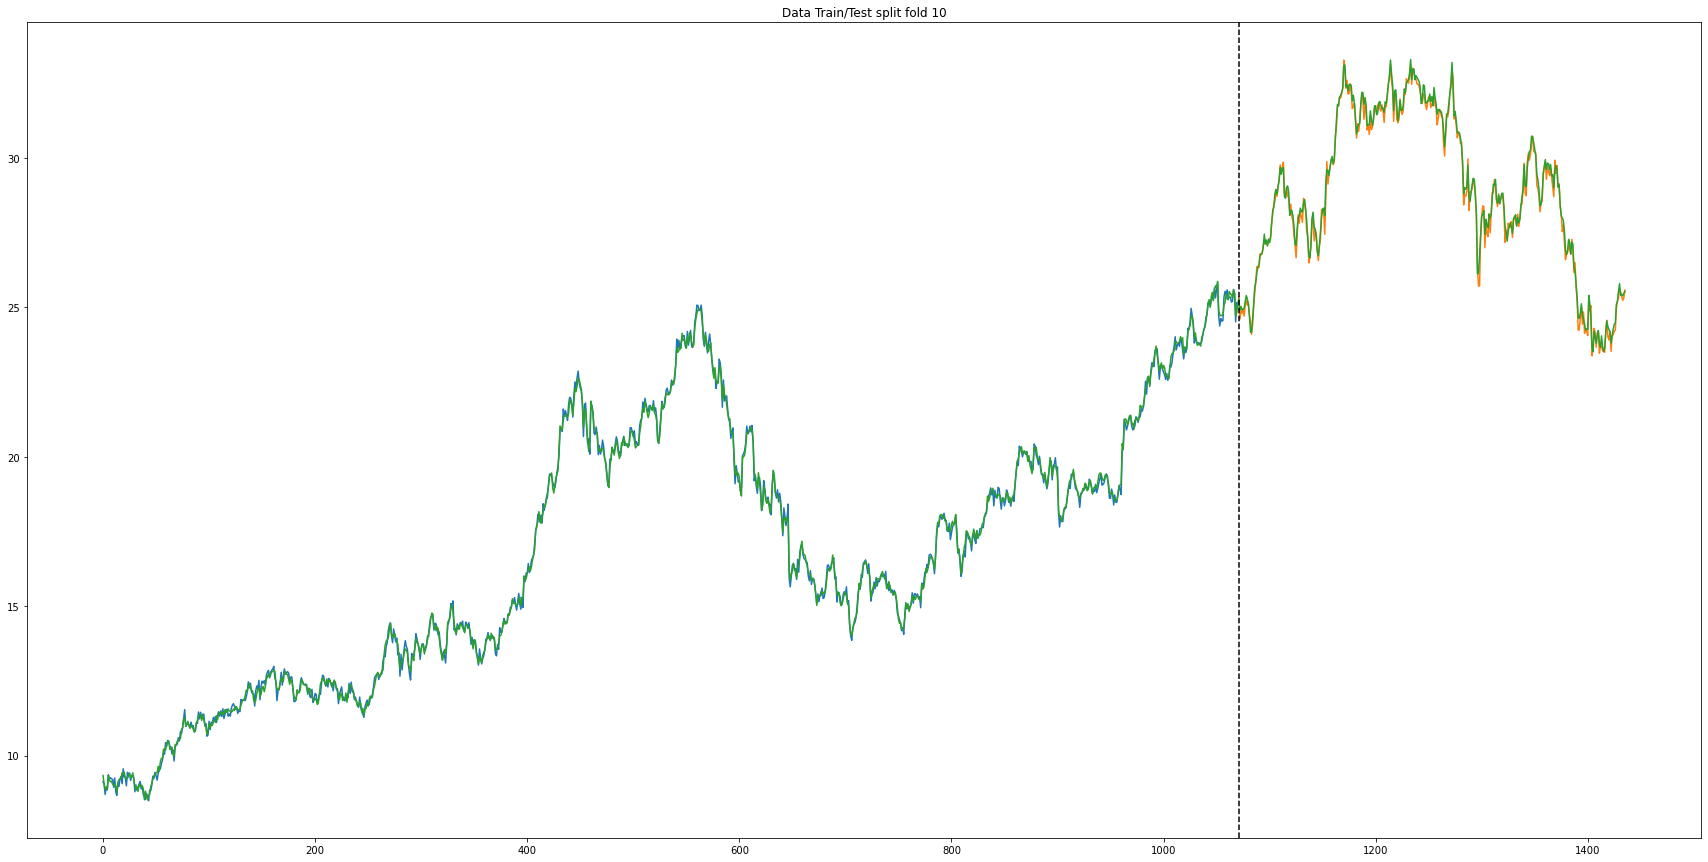

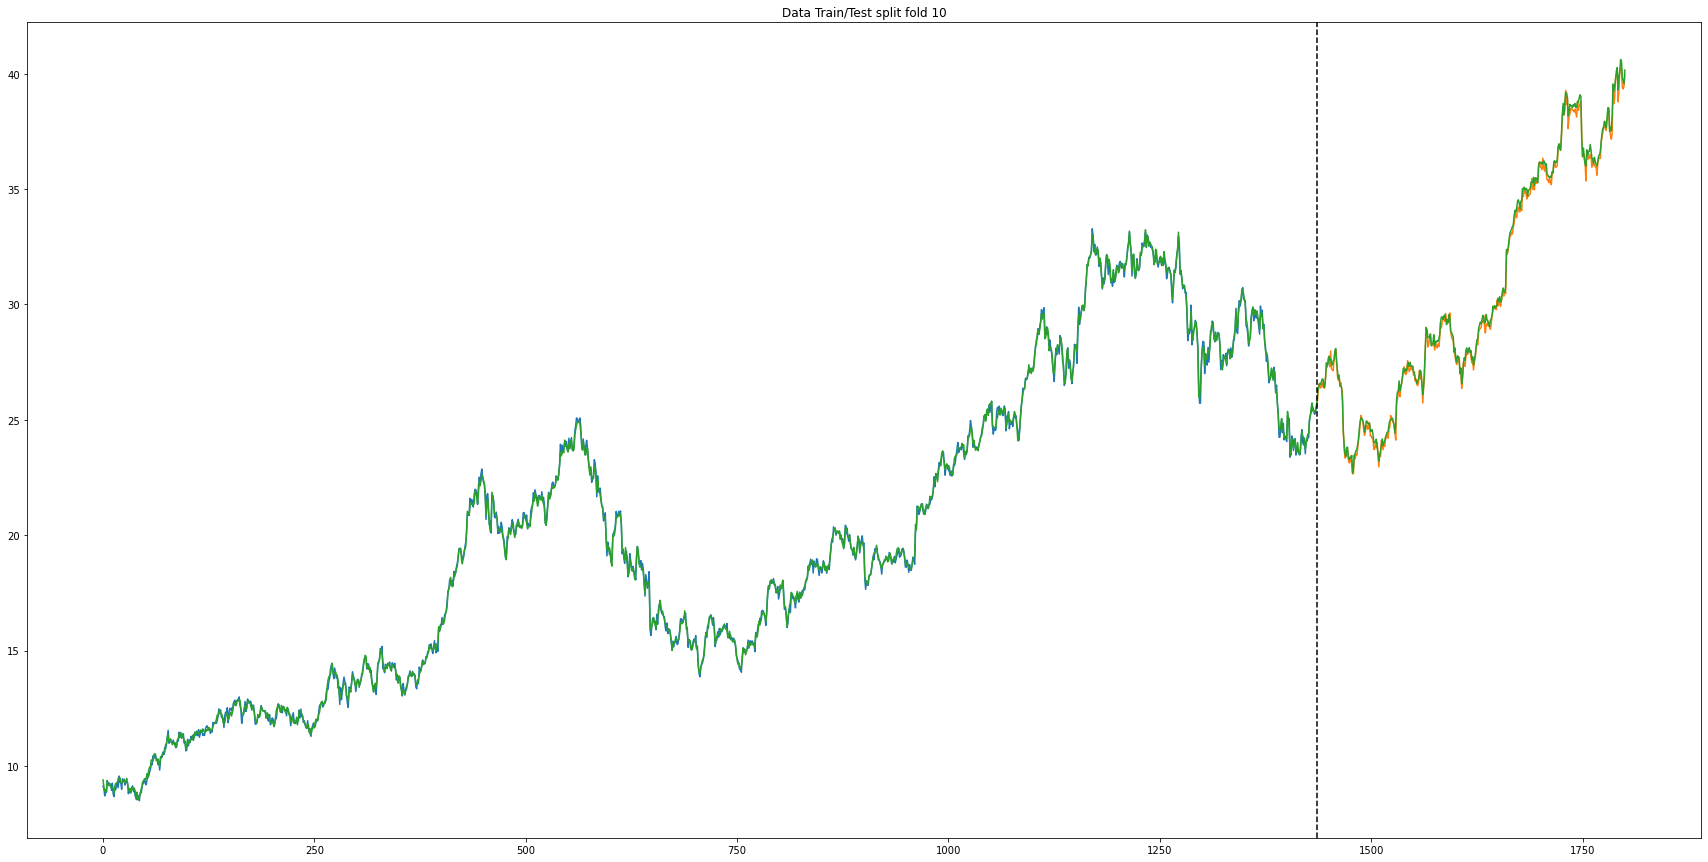

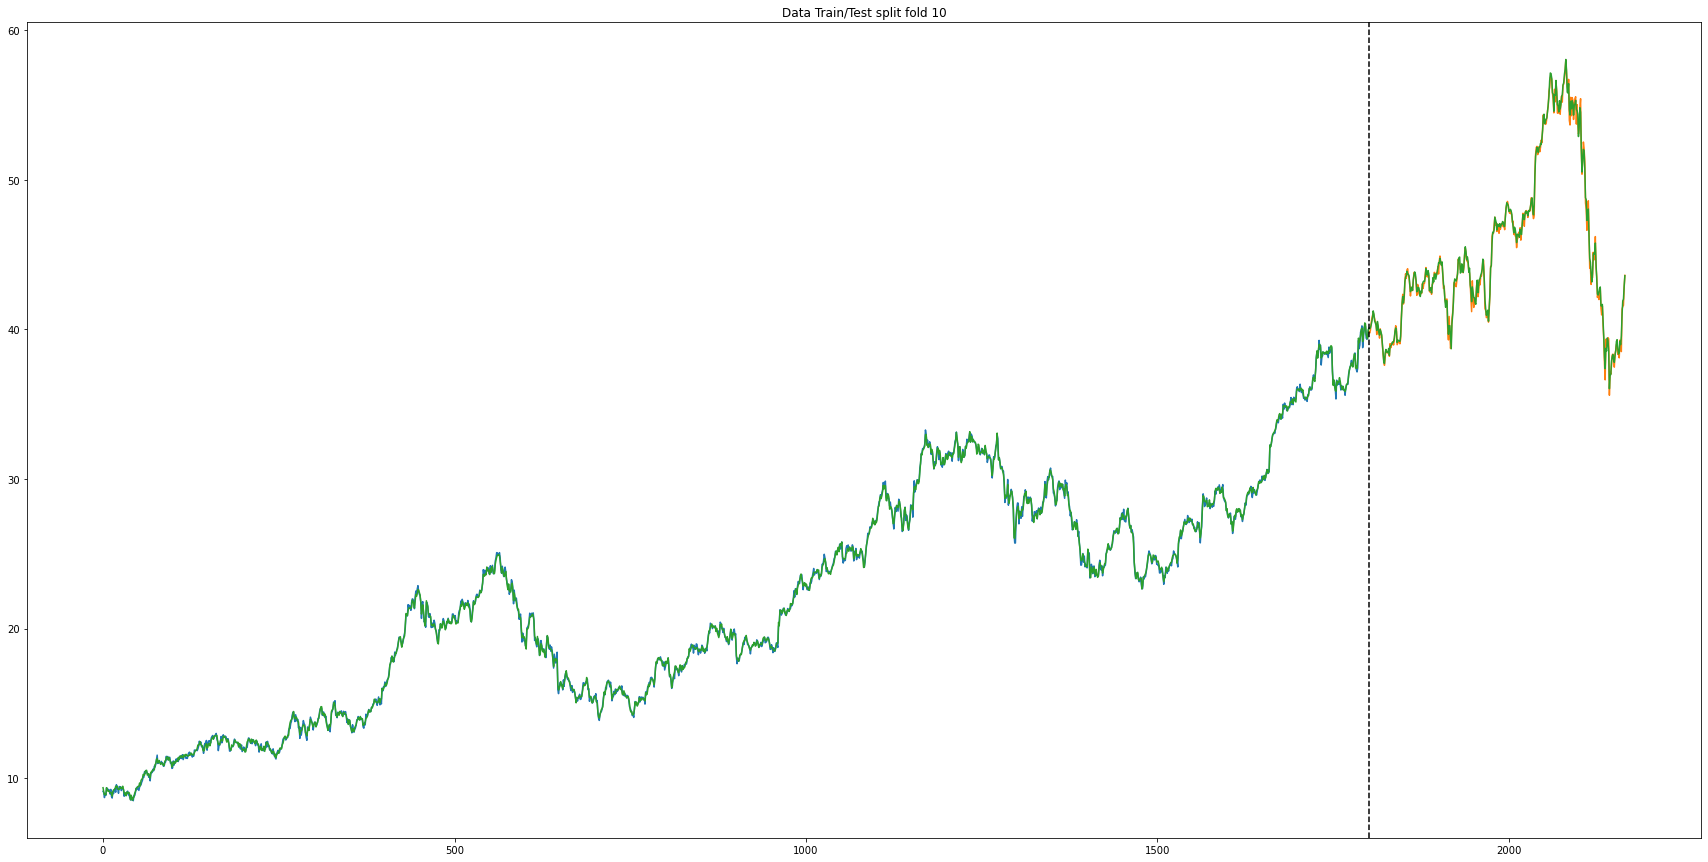

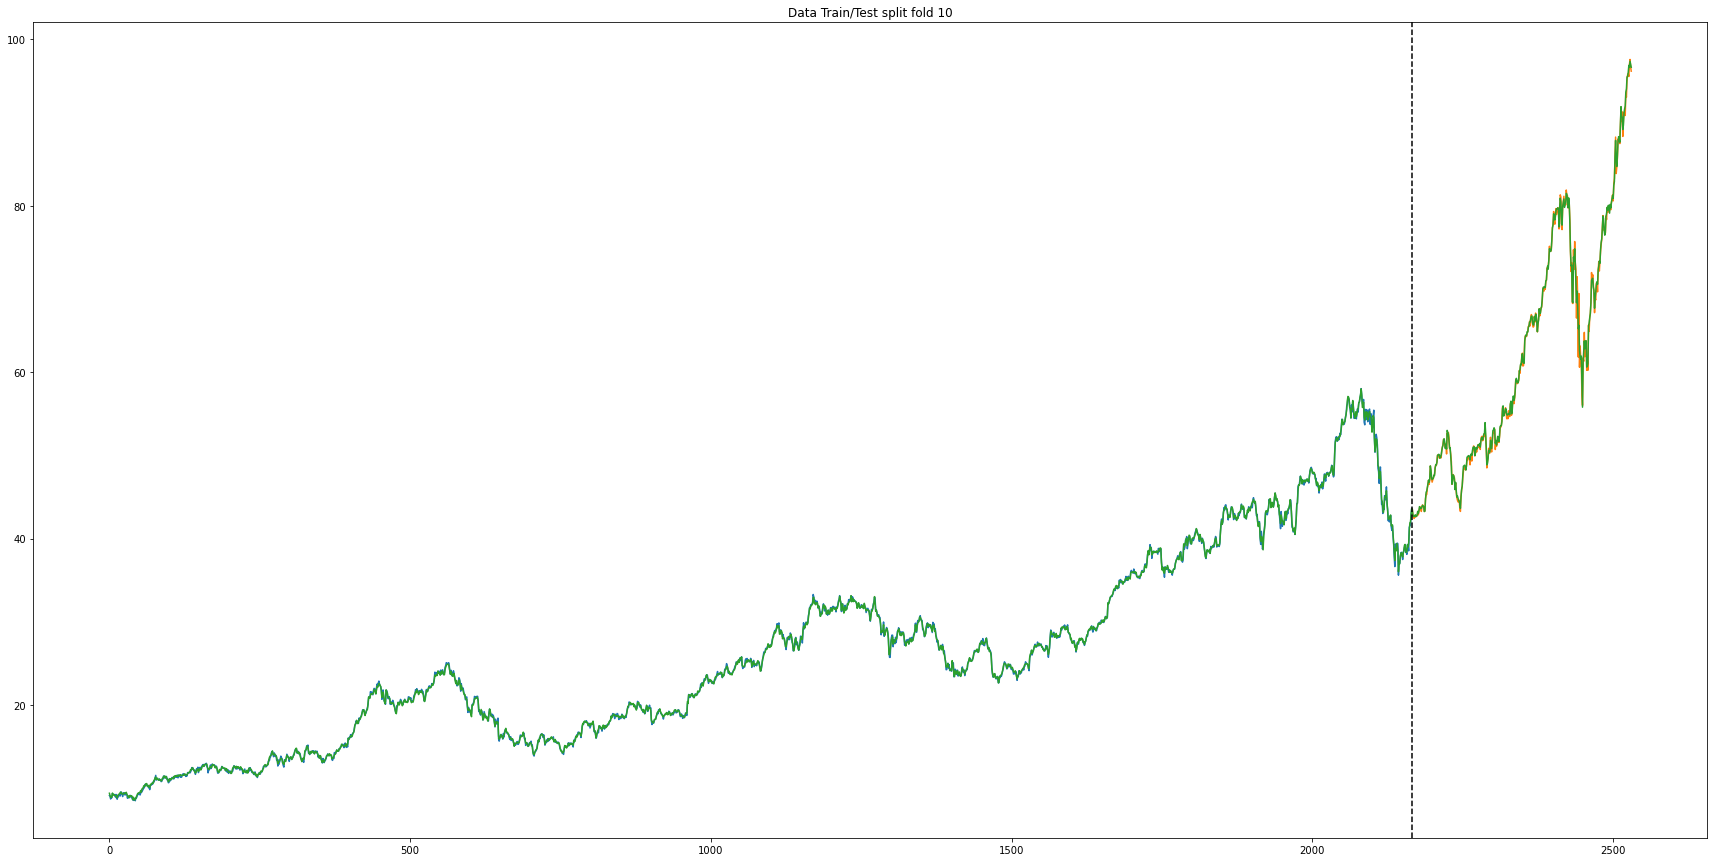

In [129]:
folds = 0

for train_idx, val_idx in tss.split(train1):
    train = train1.iloc[train_idx]
    test = train1.iloc[val_idx]
    print(f"Fold {folds}")
    print(train.shape, test.shape)
    
    X_train, y_train = train.drop(['Close', 'Date'], axis=1), train['Close']
    X_val, y_val = test.drop(['Close', 'Date'], axis=1), test['Close']
    model = LinearRegression()
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    
    fig, axs = plt.subplots(1,1, figsize=(30,15), sharex = True)
    train['Close'].plot(ax=axs,
                       label='Training set',
                       title=f'Data Train/Test split fold {fold}')
    test['Close'].plot(ax = axs,
                      label='Test set')
    
    preds = pd.Series(np.concatenate((train_preds, val_preds)))
    preds.plot(ax=axs,
                    label='prediction',)
    axs. axvline(test.index.min(), color='black', ls='--')
    
    train_rmse = mean_squared_error(y_train, train_preds)**0.5
    val_rmse = mean_squared_error(y_val, val_preds)**0.5
    print(train_rmse, val_rmse)
    print("--------------------------------------------------------")
    folds+=1

# XGBoost

Fold 0
(706, 8) (365, 8)
0.019393843003288648 0.4095653371856483
--------------------------------------------------------
Fold 1
(1071, 8) (365, 8)
0.032244656499669656 4.174456511340464
--------------------------------------------------------
Fold 2
(1436, 8) (365, 8)
0.045038971717565615 2.4521054444329535
--------------------------------------------------------
Fold 3
(1801, 8) (365, 8)
0.054689801313392385 7.344441028747901
--------------------------------------------------------
Fold 4
(2166, 8) (365, 8)
0.07083483595213479 13.575343601351198
--------------------------------------------------------


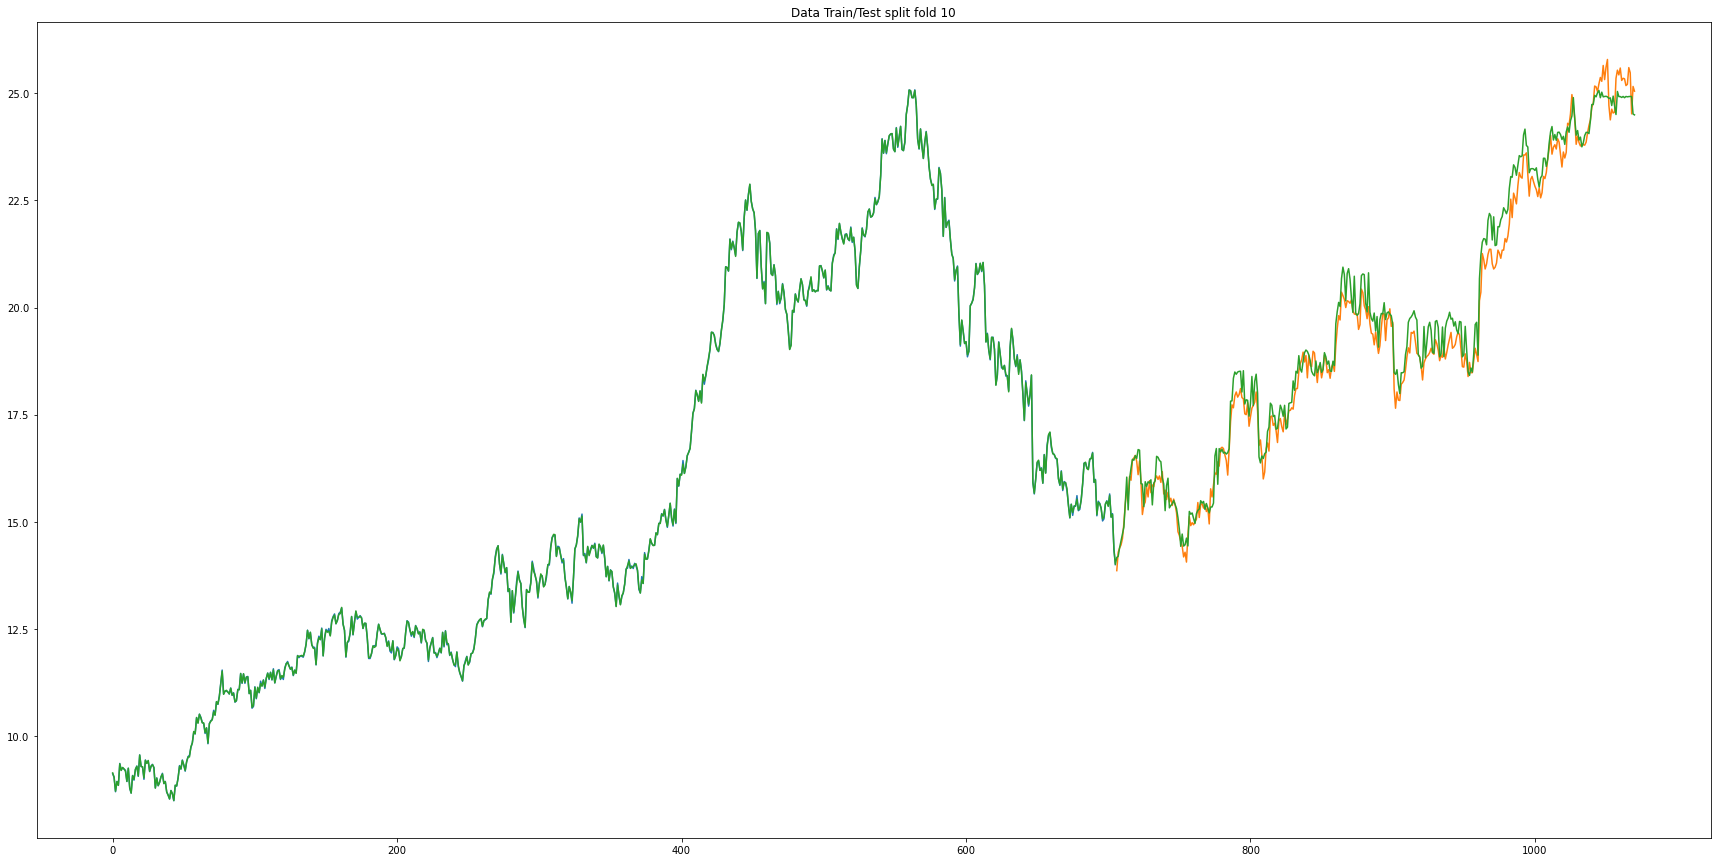

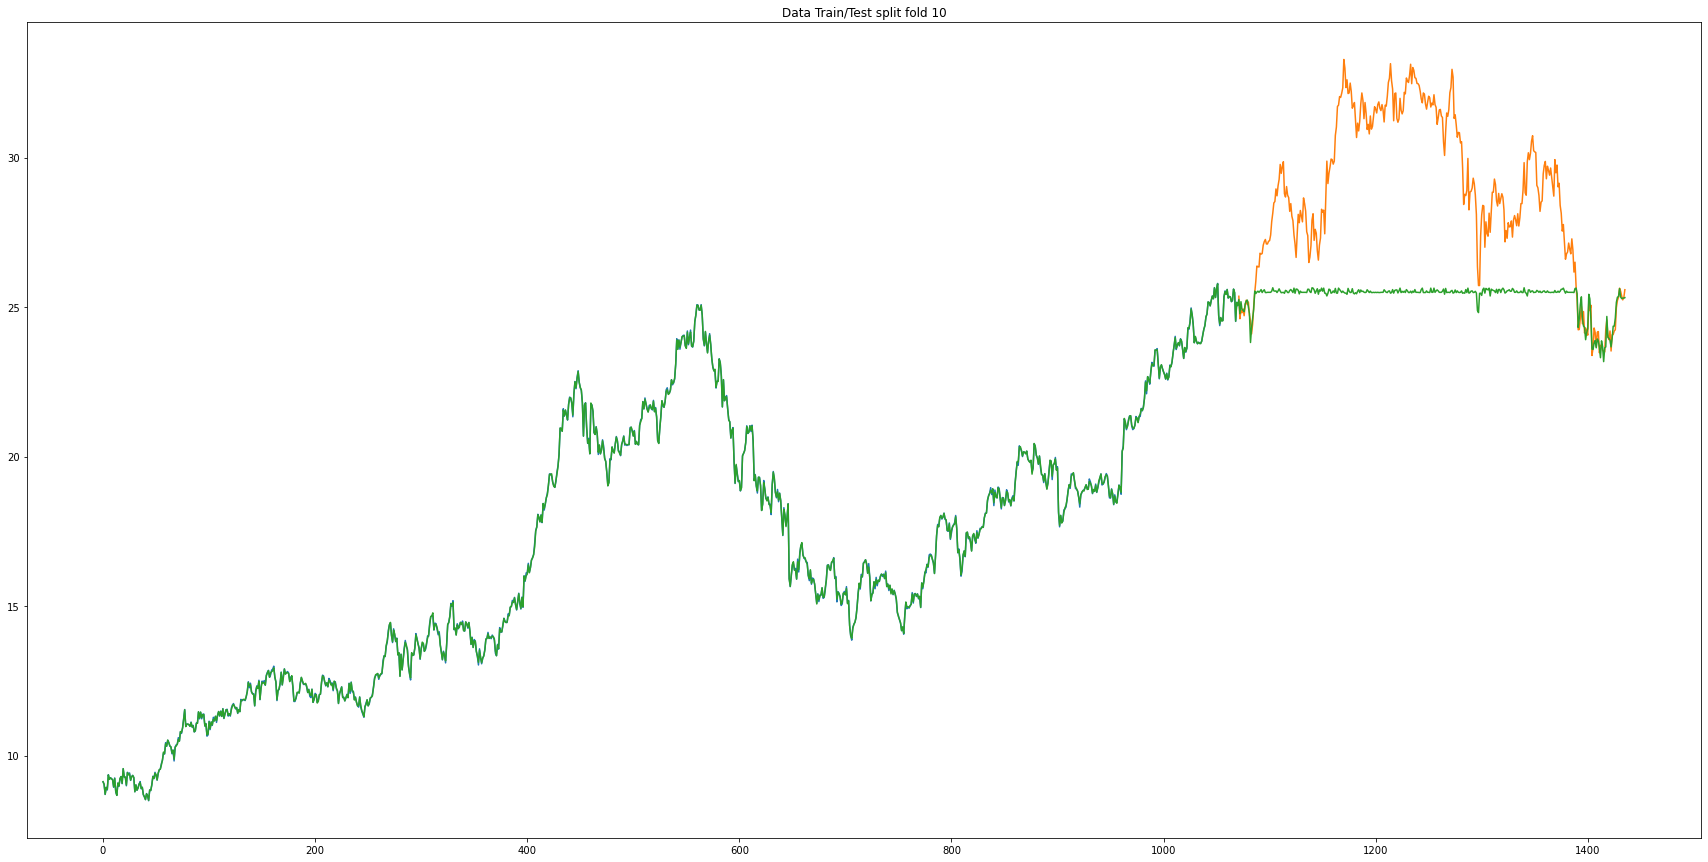

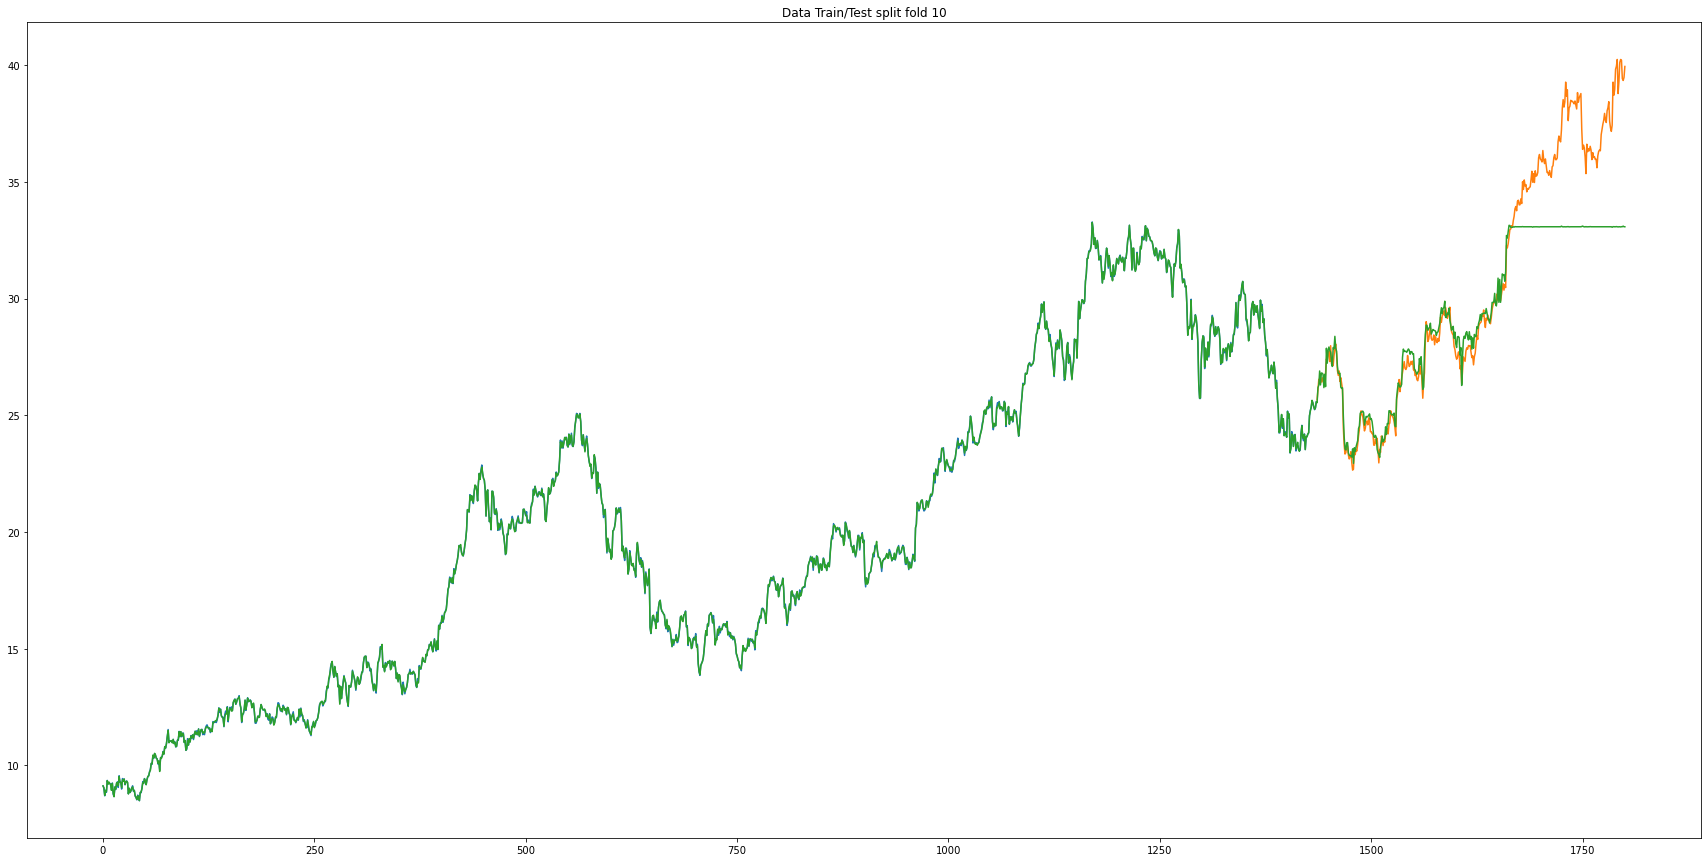

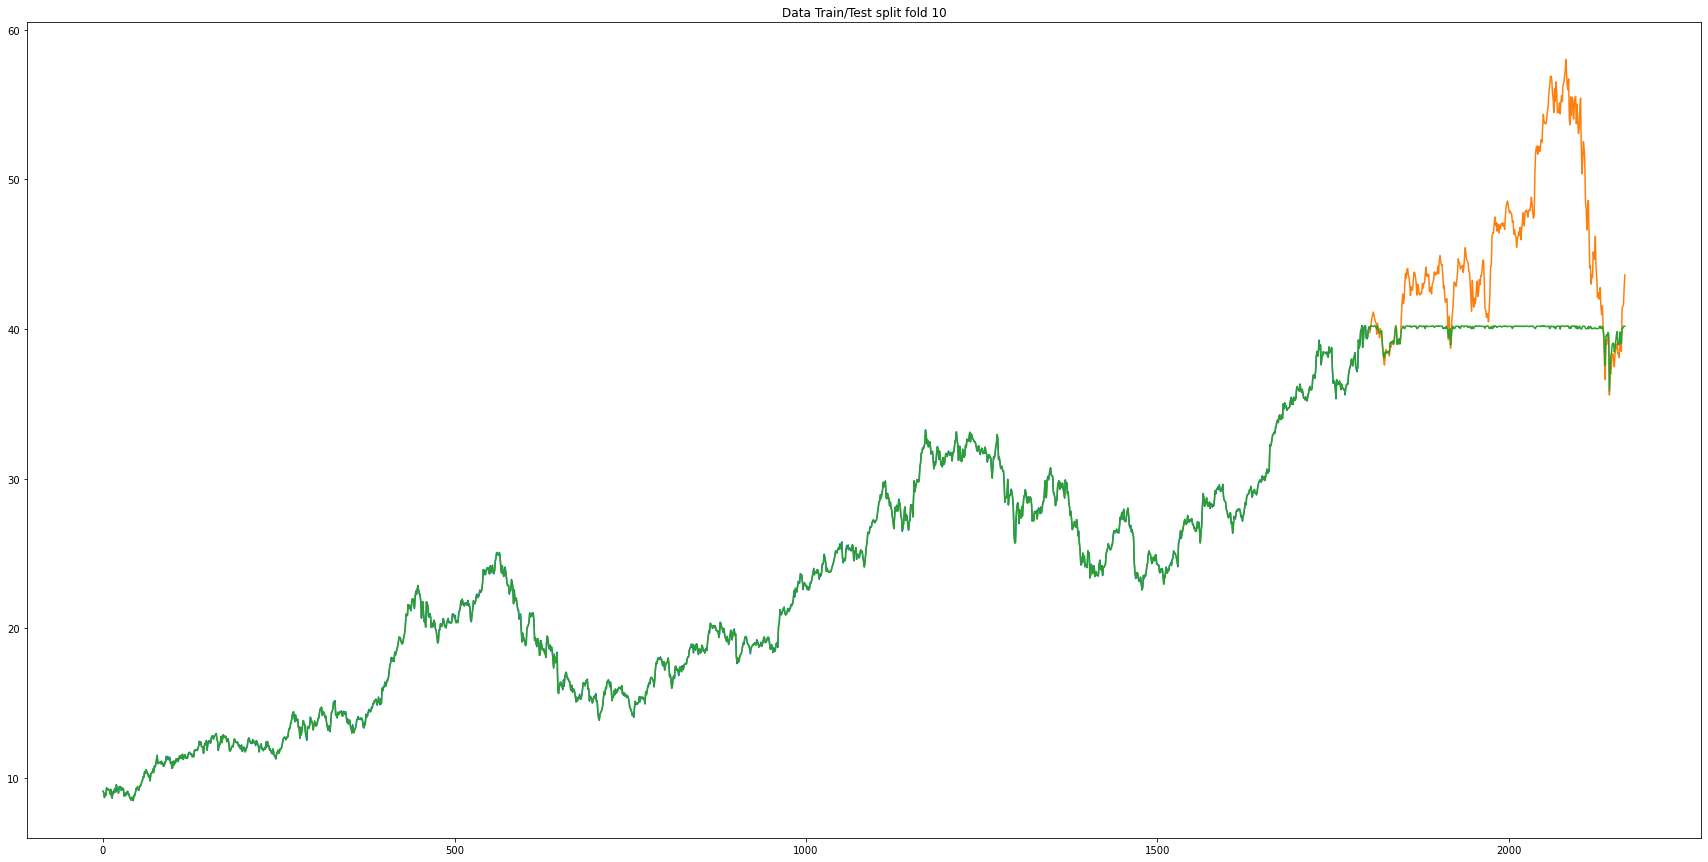

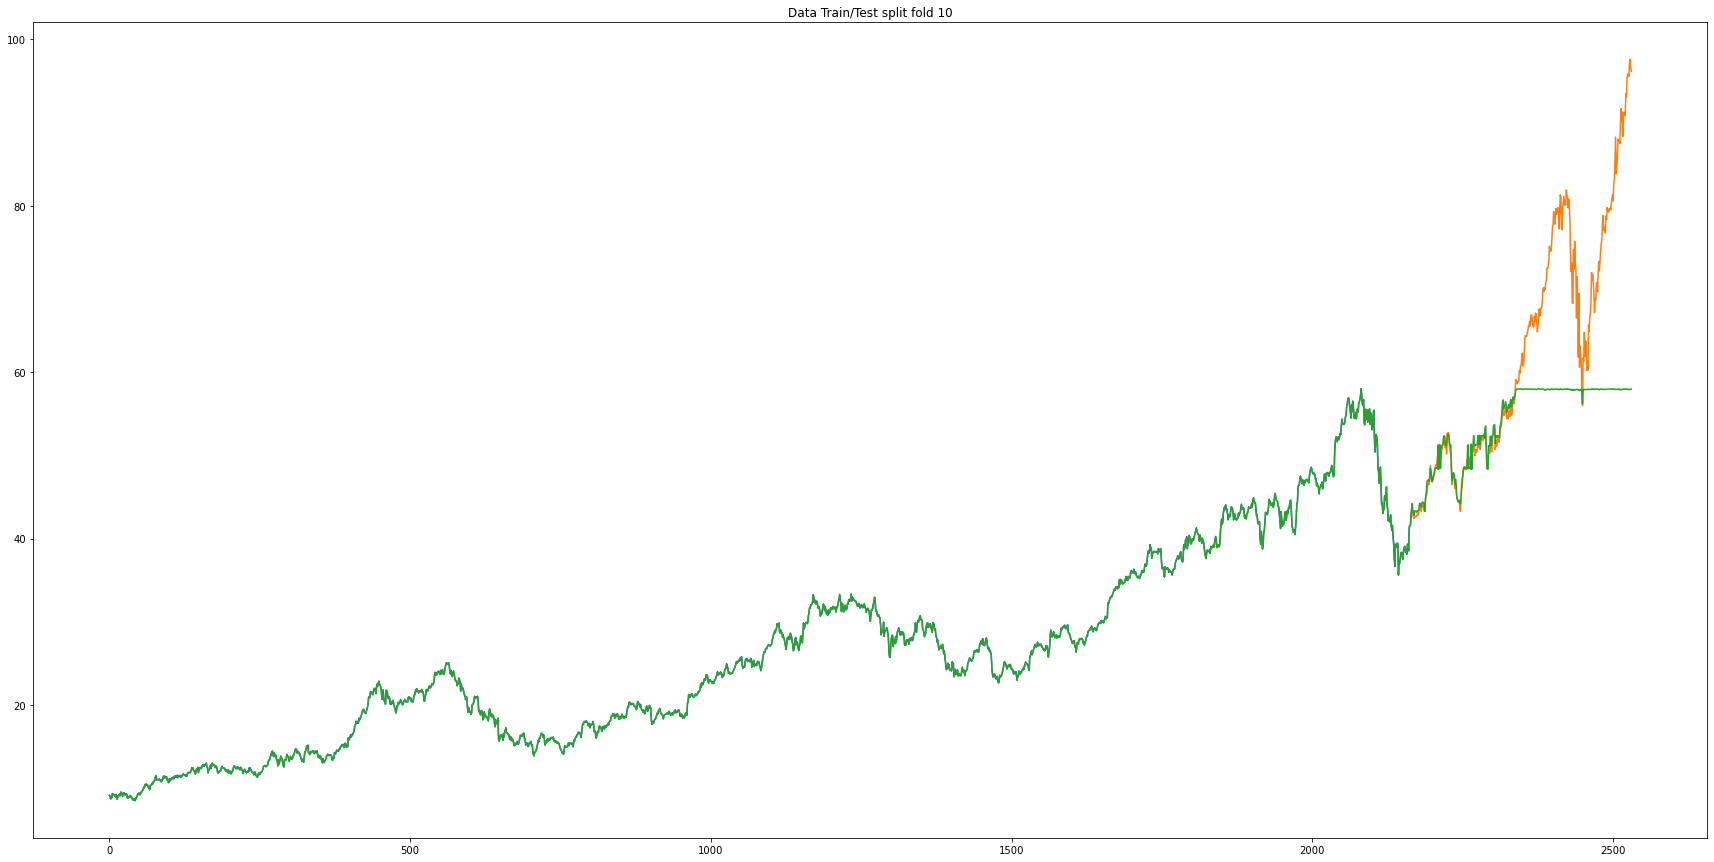

In [130]:
from xgboost import XGBRegressor
folds = 0

for train_idx, val_idx in tss.split(train1):
    train = train1.iloc[train_idx]
    test = train1.iloc[val_idx]
    print(f"Fold {folds}")
    print(train.shape, test.shape)
    
    X_train, y_train = train.drop(['Close', 'Date'], axis=1), train['Close']
    X_val, y_val = test.drop(['Close', 'Date'], axis=1), test['Close']
    model = XGBRegressor()
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    
    fig, axs = plt.subplots(1,1, figsize=(30,15), sharex = True)
    train['Close'].plot(ax=axs,
                       label='Training set',
                       title=f'Data Train/Test split fold {fold}')
    test['Close'].plot(ax = axs,
                      label='Test set')
    
    preds = pd.Series(np.concatenate((train_preds, val_preds)))
    preds.plot(ax=axs,
                label='prediction',)
    
    train_rmse = mean_squared_error(y_train, train_preds)**0.5
    val_rmse = mean_squared_error(y_val, val_preds)**0.5
    print(train_rmse, val_rmse)
    print("--------------------------------------------------------")
    folds+=1